## Merge the rental and repair-replace PR predictions



In [29]:
# Basic libraries
import geopandas as gpd
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

In [12]:
# Options
pd.set_option('display.max_columns', None)

### Load the repairReplacement and rental PR predictions

In [2]:
repairReplacementPredictions = pd.read_csv("./repair-replace/predictions/FEMA-Large-PR-predictions.csv")
print('There are {} predictions in the PR repair-replacement pipeline.'.format(len(repairReplacementPredictions)))

/Users/nitinserro/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


There are 1041745 predictions in the PR repair-replacement pipeline.


In [3]:
repairReplacementPredictions.columns

Index(['disasterNumber', 'damagedCity', 'damagedStateAbbreviation',
       'damagedZipCode', 'householdComposition', 'grossIncome', 'specialNeeds',
       'homeOwnersInsurance', 'floodInsurance', 'inspected', 'rpfvl',
       'habitabilityRepairsRequired', 'destroyed', 'waterLevel', 'floodDamage',
       'foundationDamage', 'foundationDamageAmount', 'roofDamage',
       'roofDamageAmount', 'tsaEligible', 'tsaCheckedIn',
       'rentalAssistanceEligible', 'rentalAssistanceAmount',
       'repairAssistanceEligible', 'repairAmount',
       'replacementAssistanceEligible', 'replacementAmount', 'sbaEligible',
       'renterDamageLevel', 'rentalAssistanceEndDate', 'rentalResourceCity',
       'rentalResourceStateAbbreviation', 'rentalResourceZipCode',
       'primaryResidence', 'personalPropertyEligible', 'ppfvl',
       'censusBlockId', 'censusYear', 'id', 'censusTractId', 'censusid',
       'tractid', 'tractname', 'county', 'state', 'haAmount',
       'repairReplacementAmount', 'ownRent_Own

In [4]:
rentalPredictions = pd.read_csv("./rental/predictions/FEMA-Large-PR-predictions.csv")
print('There are {} predictions in the PR rental pipeline.'.format(len(rentalPredictions)))

There are 1041745 predictions in the PR rental pipeline.


In [5]:
rentalPredictions.columns

Index(['disasterNumber', 'damagedCity', 'damagedStateAbbreviation',
       'damagedZipCode', 'householdComposition', 'grossIncome', 'specialNeeds',
       'homeOwnersInsurance', 'floodInsurance', 'inspected', 'rpfvl',
       'habitabilityRepairsRequired', 'destroyed', 'waterLevel', 'floodDamage',
       'foundationDamage', 'foundationDamageAmount', 'roofDamage',
       'roofDamageAmount', 'tsaEligible', 'tsaCheckedIn',
       'rentalAssistanceEligible', 'rentalAssistanceAmount',
       'repairAssistanceEligible', 'repairAmount',
       'replacementAssistanceEligible', 'replacementAmount', 'sbaEligible',
       'renterDamageLevel', 'rentalAssistanceEndDate', 'rentalResourceCity',
       'rentalResourceStateAbbreviation', 'rentalResourceZipCode',
       'primaryResidence', 'personalPropertyEligible', 'ppfvl',
       'censusBlockId', 'censusYear', 'id', 'censusTractId', 'fips',
       'censusid', 'tractid', 'tractname', 'county', 'state', 'fmr0', 'fmr1',
       'fmr2', 'fmr3', 'fmr4', 'oc

### Merge the dataframes by 'id'

In [15]:
# Define the set of rental columns to merge into repair-replace predictions
rental_cols = rentalPredictions.columns.difference(repairReplacementPredictions.columns).to_list()
rental_cols.append('id')
mergedDf = pd.merge(repairReplacementPredictions, rentalPredictions[rental_cols], left_on='id', right_on='id', how='inner')
print('There are {} merged predictions.'.format(len(mergedPredictions)))

There are 1041745 merged predictions.


In [16]:
mergedDf['haAmount_predicted'] = mergedDf['repairReplacementAmount_predicted'] + mergedDf['rentalAssistance_predicted']

In [17]:
mergedDf.columns

Index(['disasterNumber', 'damagedCity', 'damagedStateAbbreviation',
       'damagedZipCode', 'householdComposition', 'grossIncome', 'specialNeeds',
       'homeOwnersInsurance', 'floodInsurance', 'inspected', 'rpfvl',
       'habitabilityRepairsRequired', 'destroyed', 'waterLevel', 'floodDamage',
       'foundationDamage', 'foundationDamageAmount', 'roofDamage',
       'roofDamageAmount', 'tsaEligible', 'tsaCheckedIn',
       'rentalAssistanceEligible', 'rentalAssistanceAmount',
       'repairAssistanceEligible', 'repairAmount',
       'replacementAssistanceEligible', 'replacementAmount', 'sbaEligible',
       'renterDamageLevel', 'rentalAssistanceEndDate', 'rentalResourceCity',
       'rentalResourceStateAbbreviation', 'rentalResourceZipCode',
       'primaryResidence', 'personalPropertyEligible', 'ppfvl',
       'censusBlockId', 'censusYear', 'id', 'censusTractId', 'censusid',
       'tractid', 'tractname', 'county', 'state', 'haAmount',
       'repairReplacementAmount', 'ownRent_Own

### Create Rollup to census tract

In [18]:
# Rollup aggregations to censusTractId
mergedByCensusTractDf = mergedDf.groupby(['censusTractId', 'gisjoin']).agg({
                                           'id': ['count'], 
                                           'grossIncome': ['mean'],
                                           'householdComposition': ['mean'],                                           
                                           'specialNeeds': ['sum'], 
                                           'homeOwnersInsurance': ['sum'],
                                           'floodInsurance': ['sum'],
                                           'inspected': ['sum'],
                                           'rpfvl': ['sum'],
                                           'habitabilityRepairsRequired': ['sum'],
                                           'destroyed': ['sum'],
                                           'waterLevel': ['mean'],
                                           'floodDamage': ['sum'],
                                           'foundationDamage': ['sum'], 
                                           'foundationDamageAmount': ['sum'], 
                                           'roofDamage': ['sum'],
                                           'roofDamageAmount': ['sum'], 
                                           'tsaEligible': ['sum'], 
                                           'tsaCheckedIn': ['sum'],
                                           'rentalAssistanceEligible': ['sum'], 
                                           'rentalAssistanceAmount': ['sum'], 
                                           'repairAssistanceEligible': ['sum'],
                                           'repairAmount': ['sum'],
                                           'replacementAssistanceEligible': ['sum'], 
                                           'replacementAmount': ['sum'], 
                                           'sbaEligible': ['sum'],
                                           'primaryResidence': ['sum'], 
                                           'personalPropertyEligible': ['sum'], 
                                           'ppfvl': ['sum'],
                                           'haAmount': ['sum'],
                                           'haAmount_predicted': ['sum'],
                                           'repairReplacementAmount_predicted': ['sum'],
                                           'rentalAssistance_predicted': ['sum']
                                          }).round(2).reset_index()

In [19]:
pd.set_option('display.float_format', str)
mergedByCensusTractDf.head(20)

,censusTractId,gisjoin,id,grossIncome,householdComposition,specialNeeds,homeOwnersInsurance,floodInsurance,inspected,rpfvl,habitabilityRepairsRequired,destroyed,waterLevel,floodDamage,foundationDamage,foundationDamageAmount,roofDamage,roofDamageAmount,tsaEligible,tsaCheckedIn,rentalAssistanceEligible,rentalAssistanceAmount,repairAssistanceEligible,repairAmount,replacementAssistanceEligible,replacementAmount,sbaEligible,primaryResidence,personalPropertyEligible,ppfvl,haAmount,haAmount_predicted,repairReplacementAmount_predicted,rentalAssistance_predicted
,,,count,mean,mean,sum,sum,sum,sum,sum,sum,sum,mean,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,12099007201,G1200990007201,1,2000.0,4.0,0,0,0,1,21523.41,1,0,0.0,0,0,0.0,1,1920.0,1,1.0,1,1080.0,1,21523.41,0,0.0,0,1,1.0,14819.02,22603.41,24448.58,21531.89,2916.69
1,12103026601,G1201030026601,1,69800.0,1.0,0,0,0,1,0.0,1,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,12105012503,G1201050012503,1,20000.0,1.0,0,0,0,1,0.0,0,0,0.0,0,0,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,72001956300,G7200010956300,3034,23879.69,2.34,73,124,14,2202,6297242.05,2089,27,0.12,44,52,86689.77,741,876777.02,2771,28.0,531,441056.0,689,2788698.19,18,545495.04,101,2924,878.0,2604425.11,3775249.23,4100687.25,3298882.55,801804.7
4,72001956400,G7200010956400,35,36590.36,2.14,0,0,1,27,44463.88,22,0,0.4,2,2,5011.97,10,11940.6,32,0.0,7,5592.0,11,39423.41,0,0.0,0,32,18.0,37541.08,45015.41,54249.14,43341.39,10907.75
5,72001956500,G7200010956500,122,13109.69,2.37,4,2,1,87,264345.62,88,1,0.87,4,1,1117.03,36,38054.12,104,1.0,29,26251.0,36,118017.55,1,21964.16,3,115,41.0,122966.6,166232.71,185864.2,140114.5,45749.7
6,72001956600,G7200010956600,1040,39354.27,2.21,17,54,7,716,1329886.54,695,5,0.16,16,15,49252.91,211,215598.25,926,8.0,146,138175.0,182,660180.1,3,91487.55,26,1009,258.0,625858.67,889842.65,968515.78,745886.36,222629.42
7,72001956700,G7200010956700,506,15960.97,2.14,9,29,8,374,704028.45,304,2,0.13,12,11,4612.48,136,123651.62,414,3.0,101,105317.0,121,401896.18,2,64988.0,17,490,163.0,320987.41,572201.18,584172.43,430254.44,153917.99
8,72001956800,G7200010956800,955,22377.89,2.5,22,51,8,734,2183525.6,643,8,0.2,17,18,7815.43,280,350929.77,864,8.0,208,189456.0,271,1127337.69,6,188202.56,52,920,312.0,951804.55,1504996.25,1628124.62,1308483.5,319641.12


In [22]:
# Write aggregated predictions
mergedByCensusTractDf.to_csv("./FEMA-Large-PR-merged-predictions-census-tract.csv", index=True, encoding='utf-8')

### Visualize the gap

In [24]:
# Flatten the hierarchy
mergedByCensusTractDf.columns = [col_name[0] for col_name in mergedByCensusTractDf.columns.to_flat_index()]

# Create the avg_gap and percent_gap
mergedByCensusTractDf['avg_gap'] = (mergedByCensusTractDf['haAmount_predicted'] - mergedByCensusTractDf['haAmount'])/mergedByCensusTractDf['id']
mergedByCensusTractDf['percent_gap'] = (mergedByCensusTractDf['haAmount_predicted'] - mergedByCensusTractDf['haAmount'])/mergedByCensusTractDf['haAmount'] * 100

In [26]:
# Load the tract shapefiles
census_tract_shp = gpd.read_file('../../data/census-tract/shapefiles/cb_2017_72_tract_500k.shp')
# Make sure GEOID is type int64
census_tract_shp['GEOID'] = census_tract_shp['GEOID'].astype('int64')

In [27]:
# Merge the shapefile and predictions
census_tract_percent_gap_map = pd.merge(
    census_tract_shp, 
    mergedByCensusTractDf.loc[:, ['censusTractId', 'percent_gap']], how='left', left_on='GEOID', right_on='censusTractId')

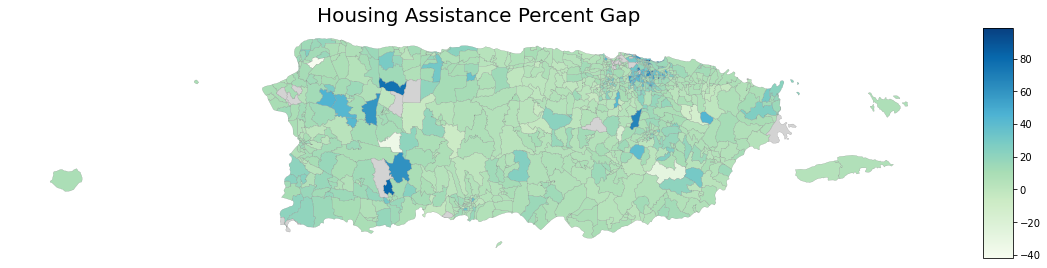

In [30]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Vislualize
fig, ax = plt.subplots(figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

census_tract_percent_gap_map.plot(column='percent_gap', edgecolor='grey', linewidth=.2, 
                                    ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={'color': 'lightgrey'})

# title and layout
ax.set_title('Housing Assistance Percent Gap', fontsize=20)
ax.axis('off')
plt.tight_layout()